In [1]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
!wget --no-check-certificate \
  https://github.com/24wemy/dataS/archive/refs/heads/main.zip \
  -O /tmp/test_train.zip

--2024-06-05 09:54:02--  https://github.com/24wemy/dataS/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/24wemy/dataS/zip/refs/heads/main [following]
--2024-06-05 09:54:02--  https://codeload.github.com/24wemy/dataS/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/test_train.zip’

/tmp/test_train.zip     [       <=>          ]  47.27M  34.6MB/s    in 1.4s    

2024-06-05 09:54:03 (34.6 MB/s) - ‘/tmp/test_train.zip’ saved [49567082]



In [3]:
!unzip /tmp/test_train.zip -d /tmp && rm /tmp/test_train.zip


Archive:  /tmp/test_train.zip
a045da324f854f2702c3c243121bebdc6168b71c
   creating: /tmp/dataS-main/
   creating: /tmp/dataS-main/dataset/
   creating: /tmp/dataS-main/dataset/boat/
  inflating: /tmp/dataS-main/dataset/boat/N_1.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_10.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_100.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_101.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_102.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_103.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_104.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_105.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_106.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_107.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_108.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_109.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_11.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_110.jpg  
  inflating: /tmp/dataS-main/dataset/boat/N_111.jpg  
  inflating:

In [4]:
!pip install split_folders

In [12]:
import cv2
import os
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [6]:
base_dir = "/tmp/dataS-main/dataset"
output_dir = "/tmp/split_dataset"

In [9]:
sf.ratio(
    input=base_dir,
    output=output_dir,
    seed=None,
    ratio=(0.8, 0.2),
    group_prefix=None
)

image_dir = '/tmp/split_dataset'
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'val')

Copying files: 2999 files [00:00, 5995.75 files/s]


In [10]:
def load_images_from_directory(directory, width, height):
    image_data = []
    image_target = []
    classes = os.listdir(directory)
    for title in classes:
        class_dir = os.path.join(directory, title)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    if img.shape[-1] == 1:
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    else:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (width, height))
                    image_data.append(img)
                    image_target.append(title)
    return np.array(image_data), np.array(image_target)


In [13]:
train_images, train_labels = load_images_from_directory(train_dir, 224, 224)
validation_images, validation_labels = load_images_from_directory(validation_dir, 224, 224)

train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.transform(validation_labels)

In [14]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()

model.add(base_model)

model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(lb.classes_), activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(validation_images, validation_labels)
)


Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 35s 183ms/step - accuracy: 0.2960 - loss: 1.9102 - val_accuracy: 0.6028 - val_loss: 1.0455
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5532 - loss: 1.1591 - val_accuracy: 0.7550 - val_loss: 0.7591
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6390 - loss: 0.9281 - val_accuracy: 0.8156 - val_loss: 0.5994
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7301 - loss: 0.7619 - val_accuracy: 0.8468 - val_loss: 0.5038
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7751 - loss: 0.6601 - val_accuracy: 0.8743 - val_loss: 0.4400
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7885 - loss: 0.6033 - val_accuracy: 0.8927 - val_loss: 0.3933
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8073 - loss: 0.5622 - val_accuracy: 0.9046 - val_loss: 0.3549
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8049 - loss: 0.5189 - val_accuracy: 0.9110 -

In [16]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['boat', 'updog', 'tree', 'corpse', 'plank']
['boat', 'updog', 'tree', 'corpse', 'plank']


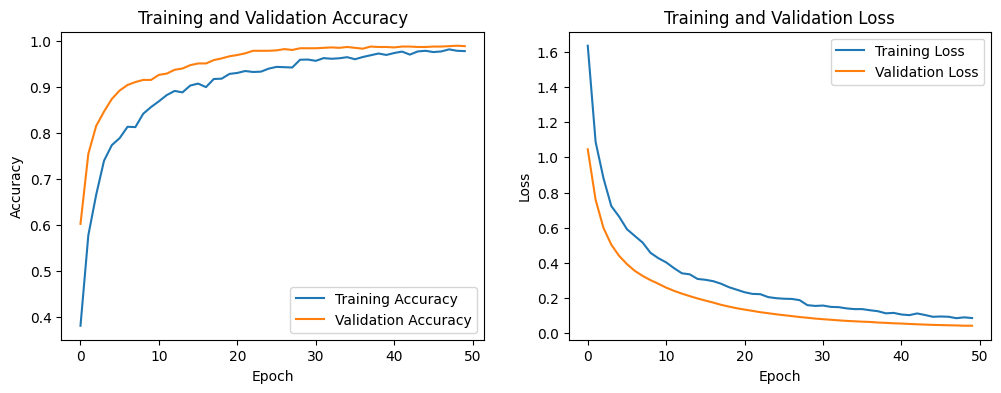

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss         = history.history['loss']
val_loss     = history.history['val_loss']

epoch        = 50
epoch_range  = range(epoch)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss,     label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step


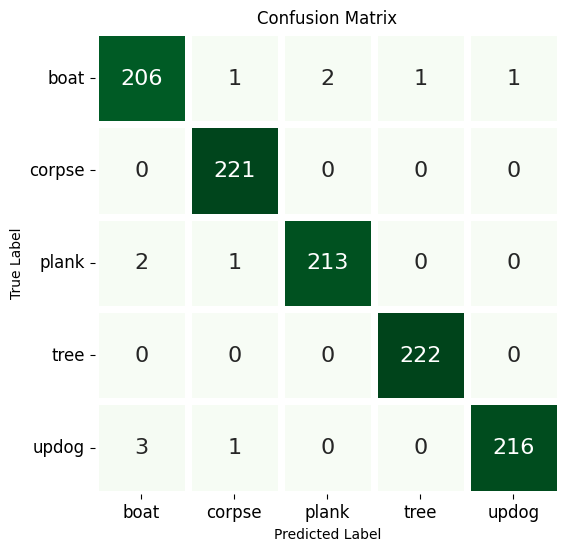

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(validation_images)

cm = confusion_matrix(np.argmax(validation_labels, axis=1), np.argmax(y_pred, axis=1))

df_cm = pd.DataFrame(cm, index=lb.classes_, columns=lb.classes_)

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_cm, annot=True, cmap="Greens", fmt='.0f', ax=ax, linewidths=5, cbar=False, annot_kws={"size": 16})

plt.xlabel("Predicted Label")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size=12)


plt.show()


In [28]:
import numpy as np
from keras.preprocessing import image

img_path = '/content/download.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

labels = ['boat', 'corpse', 'plank', 'tree', 'updog']

prediction = model.predict(img_array)

index = np.argmax(prediction)
class_names = labels[index]

accuracy = np.max(prediction) * 100

predicted_class = class_names

print(f"Predicted Class: {predicted_class}")
print(f"Prediction Accuracy: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: boat
Prediction Accuracy: 99.66%


In [19]:
model.save('/content/yogaposeNew.h5')